In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
csvfile=pd.read_csv("Classified Data")

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(csvfile)

StandardScaler()

In [63]:
scaler.fit(csvfile.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(csvfile.drop('TARGET CLASS',axis=1))

In [64]:
df_feat = pd.DataFrame(scaled_features,columns=csvfile.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [20]:
from sklearn.model_selection import train_test_split
X = df_feat
y = csvfile['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,csvfile['TARGET CLASS'],
                                                    test_size=0.6, random_state=101)


In [103]:
x_cv, new_X_test_=np.split(X_test, 2)
y_cv , new_Y_test=np.split(y_test, 2)
pred_test=knn.predict(X_test)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
k=np.arange(1,25)
training_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
Misclassification_error_rate=[]
for i in range(np.size(k)):
    knn = KNeighborsClassifier(n_neighbors=k[i])
    knn.fit(X_train,y_train)
    pred = knn.predict(x_cv)
    training_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)
    Misclassification_error_rate.append(np.mean(pred != y_cv))
    

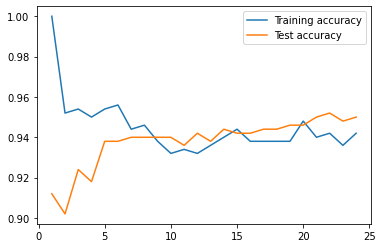

In [95]:
plt.figure()
plt.plot(k,training_accuracy,label='Training accuracy')
plt.plot(k,test_accuracy,label='Test accuracy')
plt.legend()
plt.show()

No handles with labels found to put in legend.


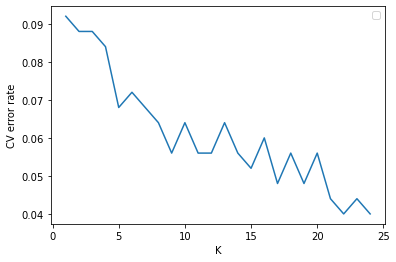

In [127]:
plt.figure()
plt.plot(k,Misclassification_error_rate)
plt.xlabel("K")
plt.ylabel("CV error rate")
plt.show()

In [128]:
the_lowest_k=np.argmin(Misclassification_error_rate)
the_lowest_k

21

In [144]:
knnew=KNeighborsClassifier(n_neighbors=the_lowest_k)
knnew.fit(X_train,y_train)
prednew = knnew.predict(X_test)

confusion_matrix(y_test,prednew)


array([[235,  15],
       [ 10, 240]], dtype=int64)

In [145]:
knnew.score(X_test,y_test)

0.95

In [146]:
knnew.score(X_train,y_test)

0.452

In [147]:
knnew.score(new_X_test_,new_Y_test)

0.944